# Logistic Regression


A statistical method best suited for binary classification problems. Instead of predicting the outcome directly, it models the probability that an outcome belongs to a particular category (e.g., spam or not spam).

Advantages:

  * Simplicity and interpretability
  * Probabilistic outputs
  * Efficient training on large datasets
  * Not affected by duplicated attributes

Disadvantages:
  * Assumes linearity between independent variables and the logit
  * Not suitable for non-linear problems without feature engineering
  * Can be affected by outliers

## Practical example

### Dataset

Let's consider a dataframe with one numeric predictor variable and one binary target variable, such as the number of **hours** a student studies for an exam and whether or not the exam was **passed**.

In [1]:
import pandas as pd

# Create the dataset as a pandas DataFrame
data = {
    "Hours": [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
    "Pass": [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df.head(5)


,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


Note that Logistic Regression uses as a convention that the target variable takes the values **0 and 1**. This makes the underlying formulas easier to work with.

We can plot the dataset as usual with `matplotlib`:

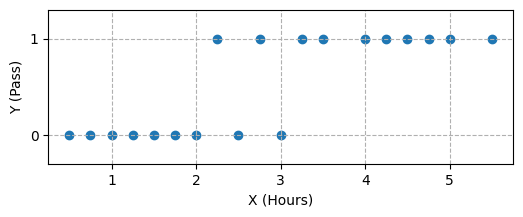

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 2))
plt.scatter(data['Hours'], data['Pass'])
plt.xlabel('X (Hours)')
plt.ylabel('Y (Pass)')
plt.yticks([0, 1])
plt.ylim([-0.3, 1.3])
plt.grid(linestyle='--')
plt.show()

### Training

Training a logistic regression in this case is as simple as calling the `fit()` function on the data:

In [3]:
from sklearn.linear_model import LogisticRegression

X = df[["Hours"]]  # Feature: Hours
y = df["Pass"]     # Target: Pass

model = LogisticRegression().fit(X, y)

### Visualising the model

The model learned by the model is essentially a function representing the probability that the target variable is 1.

We can use the model to generate probabilities for 100 evenly distributed on the $X$ axis:

In [4]:
import numpy as np
# Generate a range of Hours values
model_line_x = pd.DataFrame({'Hours': np.linspace(df["Hours"].min(), df["Hours"].max(), 100)})
# Predict probabilities for the range
model_line_y = model.predict_proba(model_line_x)[:, 1]

And then add these to the dataset visualisation from before:

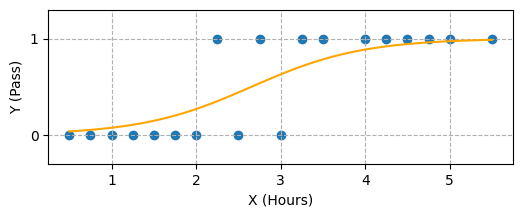

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 2))
plt.scatter(data['Hours'], data['Pass'])

# Added the model line (rest of the code is the same)
plt.plot(model_line_x, model_line_y, color="orange", label="Logistic Regression curve")

plt.xlabel('X (Hours)')
plt.ylabel('Y (Pass)')
plt.yticks([0, 1])
plt.ylim([-0.3, 1.3])
plt.grid(linestyle='--')
plt.show()

The model line shows the probability of passing the exam is steadily increasing from almost 0 to almost 1 as the number of hours of study increase, with the **tipping point of 0.5** somewhere between 2 and 3 hours (at around 2.6).

This immediately shows that the model will predict a **fail** for any value **less** than the 2.6 hour threshold and pass for any value greater.

### Predicting the class

We can quickly test this by creating a test set including 0.5 hours, 2.5 hours, 2.9 hours and 4.5 hours. We expect the first two values to be predicted as fail (i.e. value 0) and the last two values as pass (i.e. value 1).

In [6]:
## Predicting

X_test = pd.DataFrame({'Hours': [0.5, 2.5, 2.9, 4.5]})
model.predict(X_test)

array([0, 0, 1, 1])

And indeed we can see that the predictions are the expected ones.

### Predicting the probability

If we're interested not only in what is most probable, but how probable the values are we can use the `predict_proba` function as seen in the visualisation step, which will simply return the value of the probability function for each point. So for the test set above, just by looking at the graphic we can see that the four probabilities should be close to 0.5 for 2.5 and 2.9 and very low and very high for the remaining two respectively.

In [7]:
model.predict_proba(X_test)

array([[0.96416697, 0.03583303],
       [0.55945356, 0.44054644],
       [0.40811937, 0.59188063],
       [0.05654537, 0.94345463]])

Note that the results show the probability of 0 and 1 for each of the points, so if we're interested in the probability of passing the exam, we can consider only the second column:

In [8]:
model.predict_proba(X_test)[:,1]

array([0.03583303, 0.44054644, 0.59188063, 0.94345463])

## Theoretical foundations

### Assumptions

If we refer to the feature set as a matrix $X$ and the target variable as a vector $Y$ we could represent the entire training dataset as a matrix:

$$
\mathbf{D} =
\begin{bmatrix}
x_{1}^{(1)} & x_{2}^{(1)} & ... & x_{d}^{(1)} & y^{(1)} \\
x_{1}^{(2)} & x_{2}^{(2)} & ... & x_{d}^{(2)} & y^{(2)} \\
... \\
x_{1}^{(n)} & x_{2}^{(n)} & ... & x_{d}^{(n)} & y^{(n)}
\end{bmatrix}
$$

where $y^{(i)} \in \set{0, 1}$ for $i = 1,...,n$.

The _fundamental assumption_ of the logistic regression is that $P(Y|X)$ can be approximated using a logistic function.

In other words, it assumes that for a given $x^{(i)}$ and $y^{(i)}$ (i.e. for one instance of the training dataset), we have:

$$
P(y^{(i)} = 1) = \sigma(z) = \frac{e^z}{1 + e^z}
$$

and

$$
P(y^{(i)} = 0) = 1 - \sigma(z) = 1 - \frac{e^z}{1 + e^z}
$$

where $z = w_0 + w_1 x_1^{(i)} +...+ w_d x_d^{(i)}$ and $w = (w_0, w_1,...,w_d)$ and $\sigma(z)$ is the **logistic function**.

As a shorthand, if we assume that $x^{(i)}$ includes the component $x_0^{(i)} = 1$, we can write simply: $z = w \cdot x^{(i)}$ (the scalar product, or dot product).

Also, we can compress the formulas for $P(y^{(i)} = 1)$ and $P(y^{(i)} = 0)$ by making use of the fact that $y$ can only be 1 or 0, so we could write simply:

$$
P(y^{(i)}) = \sigma(z)^{y^{(i)}} [1-\sigma(z)]^{1-y^{(i)}}
$$

which give the correct answer both for $y^{(i)} = 0$ and for $y^{(i)} = 1$ and is very easy to work with when calculating the derivatives.

Given the above, assumption, the algorithm will now try to to find the **maximum likelihood estimation** of the $w$ parameter for the probability of the dataset $D$.

In other words, it will try to find the $w$ that maximizes $P(D|w)$.

### Step 1 - find the likelihood function

Since the observations are considered independent, we have: $P(D|w) = P(x^{(1)}, y^{(1)}|w) \cdot ... \cdot P(x^{(n)}, y^{(n)}|w)=\prod_{i=1}^nP(x^{(i)}, y^{(i)}|w).$

But, as we've seen above, the fundamental assumption of the logistic regression is that there is a specific function for $P(y^{(i)} | x^{(i)})$, so we can further write the above function (using the conditional probability formula):

$$
P(D|w) = \prod_{i=1}^nP(y^{(i)}, x^{(i)}|w) = \prod_{i=1}^nP(y^{(i)}|x^{(i)}, w)P(x^{(i)}| w)
$$

### Step 2 - apply the logarithm (find the log-likelyhood)

\begin{align}
l(w) &= \ln P(D|w)\\
&= \ln \prod_{i=1}^nP(y^{(i)}|x^{(i)}, w)P(x^{(i)}| w)\\
&= \ln \prod_{i=1}^nP(y^{(i)}|x^{(i)}, w) + \ln \prod_{i=1}^n P(x^{(i)}| w)
\end{align}

However, note that the second part of the sum, namely the term $\ln \prod_{i=1}^n P(x^{(i)}| w)$ is not a function of $w$, so is constant as far as maximising $P(D|w)$ is concerned. We can replace it with a constant $l_z$:

$$
l(w) =\ln \prod_{i=1}^nP(y^{(i)}|x^{(i)}, w) + l_z
$$

We can now replace the logistic formula discussed above, to get:

$$
l(w) = \sum_{i=1}^n \ln [\sigma(z)^{y^{(i)}} [1-\sigma(z)]^{1-y^{(i)}}] + l_z
$$

And after applying the logarithm:

$$
l(w) = \sum_{i=1}^n (y^{(i)} \ln \sigma(z) + (1-y^{(i)}) \ln(1-\sigma(z))) + l_z
$$

### Step 3 - find the maximum of the log-likelihood

If we calculate the partial derivative with respect to the component $w_j$ we get:
$$
\frac{\partial}{\partial{w_j}}l(w) = \sum_{i=1}^n[y^{(i)}-\sigma(w \cdot x^{(i)})]x_j^{(i)}.
$$

Normally at this step we want to set the derivative equal to 0 and find the analytical solution. However, in this case there is no closed form formula, but the function is concave and does have a global maximum, so a **gradient ascent** algorithm can be used used, where the increment at each step on the dimension $j$ is given by:

$$
w_j^{new} = w_j^{old} + \eta \frac{\partial}{\partial{w_j}}l(w^{old}),
$$

where $\eta$ is the *learning rate*. A small value of the learning rate typically means slower convergence (longer time to find the optimum) but a more accurate result, while a large value of $\eta$ means faster convergence, but a possibility to "overshoot" the target, and not converge on the optimum value for the maximum. 

In practice though this is not an issue as the solvers included in `sklearn` are both robust and very accurate.